In [1]:
%run StatTest2_WithSimulation_Setup.ipynb

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [2]:
data2014 = pd.read_csv("Our_Dataset/2014dataset.csv")
data2015 = pd.read_csv("Our_Dataset/2015dataset.csv")
data2016 = pd.read_csv("Our_Dataset/2016dataset.csv")
data2017 = pd.read_csv("Our_Dataset/2017dataset.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,52,323,649,882,932,1092,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,57,204,341,376,377,396,430,431,928,944,1006,1013,1151,1160,1169,1179,1411) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,17,163,355,406,702,835,847,1083,1156,1183,1185,1200) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create the labels.
# By index:
# label 2 is transfers
# label 3 is premiums
# label 4 is costs
# label 5 is member months
# label 6 is reinsurance (individual group only)

ind_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                  "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                  "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "STATE", "REINSURANCE PAYMENT AMOUNT (OR NOT ELIGIBLE)"] # no more reinsurance as of 2017
ind_labels_15 = [label.replace('15', '16') for label in ind_labels_14]
ind_labels_16 = [label.replace('15', '17') for label in ind_labels_14]
ind_labels_17 = [label.replace('15', '18') for label in ind_labels_14][:-1]

sg_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                 "HHS RISK ADJUSTMENT TRANSFERS AMOUNT (SMALL GROUP MARKET)",
                  "1.1Directpremiumwritten7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "2.16Totalincurredclaims7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15", "STATE"]
sg_labels_15 = [label.replace('15', '16') for label in sg_labels_14]
sg_labels_16 = [label.replace('15', '17') for label in sg_labels_14]
sg_labels_17 = [label.replace('15', '18') for label in sg_labels_14]

In [4]:
# Filter the data to include only the fields we want

ind_data_14 = data2014[ind_labels_14].dropna()
ind_data_15 = data2015[ind_labels_15].dropna()
ind_data_16 = data2016[ind_labels_16].dropna()
ind_data_17 = data2017[ind_labels_17].dropna()
sg_data_14 = data2014[sg_labels_14].dropna()
sg_data_15 = data2015[sg_labels_15].dropna()
sg_data_16 = data2016[sg_labels_16].dropna()
sg_data_17 = data2017[sg_labels_17].dropna()

In [5]:
# Drop companies with <2000 MM
ind_data_14 = ind_data_14.where(ind_data_14[ind_labels_14[5]] > 2000).dropna()
ind_data_15 = ind_data_15.where(ind_data_15[ind_labels_15[5]] > 2000).dropna()
ind_data_16 = ind_data_16.where(ind_data_16[ind_labels_16[5]] > 2000).dropna()
ind_data_17 = ind_data_17.where(ind_data_17[ind_labels_17[5]] > 2000).dropna()
sg_data_14 = sg_data_14.where(sg_data_14[sg_labels_14[5]] > 2000).dropna()
sg_data_15 = sg_data_15.where(sg_data_15[sg_labels_15[5]] > 2000).dropna()
sg_data_16 = sg_data_16.where(sg_data_16[sg_labels_16[5]] > 2000).dropna()
sg_data_17 = sg_data_17.where(sg_data_17[sg_labels_17[5]] > 2000).dropna()

In [6]:
# Calculate transfers, premiums, costs, and reinsurance (if individual group) per member month
def calculate_pmm(df, df_labels, group):
    df["MM"] = df[df_labels[5]]
    df["Transfers"] = df[df_labels[2]]
    df["TotalCosts"] = abs(df[df_labels[4]])
    df["Enrollees"] = df["MM"] / 12
    df["TransfersPerEnrollee"] = df["Transfers"] / df["Enrollees"]
    df["TransfersPerSqrtEnrollee"] = df["Transfers"] / np.sqrt(df["Enrollees"])
    df["LogEnrollees"] = np.log(df["Enrollees"])
    df["LogTransfers"] = np.log(df["Transfers"]**2 + 1)
    df["TransfersPMM"] = df[df_labels[2]] / df[df_labels[5]]
    df["PremiumsPMM"] = abs(df[df_labels[3]] / df[df_labels[5]])
    df["CostsPMM"] = abs(df[df_labels[4]] / df[df_labels[5]])
    if group == "i":
        df["ReinsurancePMM"] = df[df_labels[7]] / df[df_labels[5]]
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"] + df["ReinsurancePMM"]
        #df["PremMinusCostsPlusReinsurancePMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["ReinsurancePMM"]
    elif group == "sg":
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["PremMinusCostsPMM"] = df["PremiumsPMM"] - df["CostsPMM"]
    df["PremMinusCostsPlusTransfersPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["SicknessPMM"] = df["CostsPMM"] - df["PremiumsPMM"]
    average_sickness = np.mean(df["SicknessPMM"])
    df["ExcessSicknessPMM"] = df["SicknessPMM"] - average_sickness
    return df

ind_data_14 = calculate_pmm(ind_data_14, ind_labels_14, "i")
ind_data_15 = calculate_pmm(ind_data_15, ind_labels_15, "i")
ind_data_16 = calculate_pmm(ind_data_16, ind_labels_16, "i")
ind_data_17 = calculate_pmm(ind_data_17, ind_labels_17, "sg")
sg_data_14 = calculate_pmm(sg_data_14, sg_labels_14, "sg")
sg_data_15 = calculate_pmm(sg_data_15, sg_labels_15, "sg")
sg_data_16 = calculate_pmm(sg_data_16, sg_labels_16, "sg")
sg_data_17 = calculate_pmm(sg_data_17, sg_labels_17, "sg")

In [7]:
# Combine the dataframes by left merging

ind_data = ind_data_14.merge(ind_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(ind_data_16, on='HIOS ID', how='outer').merge(ind_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [8]:
# Do the same thing for small group

sg_data = sg_data_14.merge(sg_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(sg_data_16, on='HIOS ID', how='outer').merge(sg_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [9]:
states = ["NY"]
dfs = [sg_data_14, sg_data_15, sg_data_16, sg_data_17]

In [10]:
dfs_new = normalize_empirical_data_to_avg_2017_dollars(dfs, states)

Cbar is 4398.953
NY 14 Ratio is 0.973
NY 15 Ratio is 0.896
NY 16 Ratio is 0.862
NY 17 Ratio is 0.782
Empirical Transfers Sum = 1827788284.445


In [11]:
for df_temp in dfs_new:
    df_temp["TransfersNormalizedPerSqrtEnrollee"] = df_temp["TransfersNormalized"] / np.sqrt(df_temp["Enrollees"])

In [50]:
stateyear_to_df = dict()
stateyear_to_random = dict()
    
for current_state in states:
    for df_index in range(4):
        label = current_state + df_index_to_year[df_index]
        this_df = state(dfs[df_index], current_state)
        if len(this_df) > 0:
            sum_n = sum(this_df["Enrollees"])
            this_df["sum_n_minus_n_i"] = sum_n - this_df["Enrollees"]
            this_df["a"] = this_df["Enrollees"] * (this_df["sum_n_minus_n_i"] / sum_n)**2 + this_df["sum_n_minus_n_i"] * (this_df["Enrollees"] / sum_n)**2
            this_df["sqrt_a"] = np.sqrt(this_df["a"])
            
            cost_matrix = [np.random.normal(0, sqrta, 10**5) for sqrta in this_df["sqrt_a"]]
            #this_df["sim_distr"] = np.random.normal(0, this_df["sqrt_a"], 10000)
        stateyear_to_df[label] = this_df
        stateyear_to_random[label] = np.array(cost_matrix)

In [51]:
np.array(cost_matrix)[:,10000]

array([  -45.30709037,    -1.31798592,  -112.60530607,   -37.28991362,
         -48.42996265,    15.1348645 ,   -81.29269679,    21.59300856,
           3.95922367,    39.71886287,    19.90705812,     9.69247239,
        -591.56232343,   -78.63122793,  -520.07357132, -1092.4148053 ,
         -98.67262208,  -225.87847658,   -94.9526236 ,    36.92190693])

In [59]:
lab = "TransfersNormalizedPerSqrtEnrollee"


percentile_idx = int(79 * 0.1)
abs_empirical_transfers = np.absolute(np.concatenate((np.array(dfs_new[0][lab]),
                                                    np.array(dfs_new[1][lab]),
                                                    np.array(dfs_new[2][lab]),
                                                    np.array(dfs_new[3][lab]))))
sorted_abs_empirical_transfers = np.sort(abs_empirical_transfers)

p10empirical = sorted_abs_empirical_transfers[percentile_idx]
print(p10empirical)

3726.944365992881


In [52]:
%run StatTest2_WithSimulation_Setup.ipynb

beta = 100000
k = len(sorted_abs_empirical_transfers)
q10, at3, _ = apr_test_imbalances_2017(stateyear_to_df, stateyear_to_random, beta, k, 0.1, 0.01)

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [53]:
beta2 = 60000
q102, at32, _ = apr_test_imbalances_2017(stateyear_to_df, stateyear_to_random, beta2, k, 0.1, 0.01)

0 iterations completed in 0.0 s
10000 iterations completed in 60.8 s
20000 iterations completed in 62.3 s
30000 iterations completed in 64.2 s
40000 iterations completed in 64.7 s
50000 iterations completed in 65.0 s
60000 iterations completed in 61.2 s
70000 iterations completed in 65.0 s
80000 iterations completed in 68.9 s
90000 iterations completed in 65.5 s
[  854.98936201  1007.12266625  1031.08527719 ... 20382.02842963
 21424.17306356 26296.38235751]
q10 = 2649.304
Sum sqrt(a) = 0.000


In [58]:
assert(q10 * 60000 / 100000 - q102 < 0.01)

In [60]:
p10empirical * 100000 / q10

84405.82523782783

In [108]:
df2 = create_df2(states, dfs_new, "TransfersNormalizedPerSqrtEnrollee")
k = len(df2)
v = np.linspace(0, max(abs(df2)), 10000)
v = v[1:len(v)]

ratios = [ratio_list(df2, vi) for vi in v]
#print(ratios)
begin_p = 5/k
end_p = 1-begin_p
start_index = 0
end_index = 0
for index, ratio2 in enumerate(ratios):
    if ratio2 >= begin_p:
        start_index = index
        break
    
for index, ratio2 in enumerate(ratios):
    if ratio2 > end_p:
        end_index = index
        break

if end_index == 0:
    end_index = len(v) - 1
    
v = v[start_index:end_index]

ratios2 = ratios[start_index:end_index]
#multiplier = [np.sqrt(2)/vi for vi in v]
ratios_sim1 = [ratio_list(at3[0], vi) for vi in v]
ratios_sim2 = [ratio_list(at3[1], vi) for vi in v]
ratios_sim3 = [ratio_list(at3[2], vi) for vi in v]

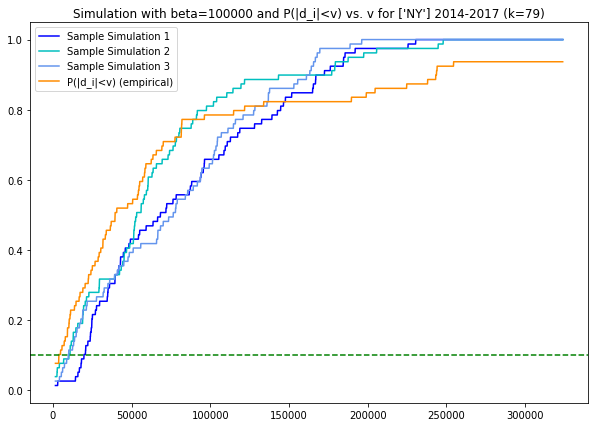

In [109]:

plt.figure(figsize=(10, 7))
plt.plot(v, ratios_sim1, label="Sample Simulation 1", color='b')
plt.plot(v, ratios_sim2, label="Sample Simulation 2", color='c')
plt.plot(v, ratios_sim3, label="Sample Simulation 3", color='cornflowerblue')
plt.plot(v, ratios2, label="P(|d_i|<v) (empirical)", color='darkorange')
plt.title("Simulation with beta=%d and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (beta, states, len(df2)))
plt.axhline(y=0.1, color='g', linestyle='--')
plt.legend()
#print("beta = %.3f" % (max_beta))y eye